all exercises based on [Introduction to Deep Learning for NLP](https://wikidocs.net/24987)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 활성화 함수

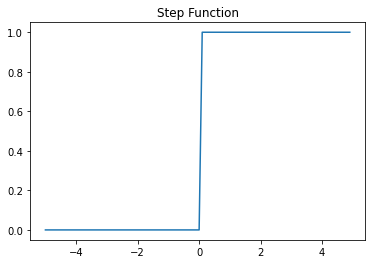

In [2]:
# 계단함수 (step function)
def step(x):
    return np.array(x>0, dtype = np.int) # 0보다 크면 그 값만 1로 반환해라 (True로 반환되게 되어있는데, dtype을 int로 설정)
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)

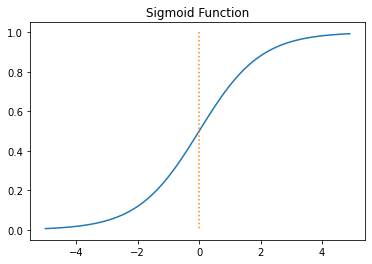

In [3]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x)) # w = 1, b = 0이라 가정?
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

인공신경망 학습 과정:<br>
1. 입력에 대해 순전파 연산 (forward propagation)
2. 순전파 연산을 통해 나온 예측값과 실제값의 오차 계산 by loss function
3. 미분을 통해 loss function의 현재 기울기 구하고
4. 이를 통해 역전파 수행 (back propagation)

3번에서 미분해 기울기를 구할 때, 기울기가 0에 가까운 아주 작은 값이 나오는 구간이 있음 (위의 그래프 상 양끝)<br>
역전파 과정에서 아주 작은 기울기가 곱해지게 되면, 앞단에 기울기가 잘 전달되지 않게 됨 --> **기울기 소실(Vanishing Gradient) 문제**<br>
따라서 시그모이드 함수를 사용하는 은닉층의 개수가 많아지면, 0에 가까운 기울기가 계속 곱해지면서 앞단에서는 거의 기울기를 전파받을 수 없게 됨. 즉, W(매개변수)가 업데이트 되지 않아 학습이 불가..!

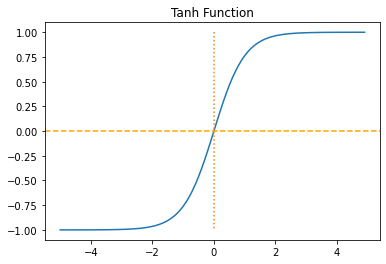

In [4]:
# 하이퍼볼릭 탄젠트 함수 : 입력값을 -1, 1 사이의 값으로 변환
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0], [1.0,-1.0], ':')
plt.axhline(y=0, color = 'orange', linestyle='--')
plt.title('Tanh Function')
plt.show()


-1, 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제 발생 (-1, 1에 가까울수록 기울기가 0에 가까워짐)<br>
하지만 시그모이드 함수와 달리 0을 중심으로 하고 있어, 시그모이드 함수에 비해 반환값의 변화 폭이 더 큼. 시그모이드 함수보다는 기울기 소실 증상이 적은 편. 은닉층에서 시그모이드보다는 많이 사용됨. (여전히 기울기 소실 문제 있음)

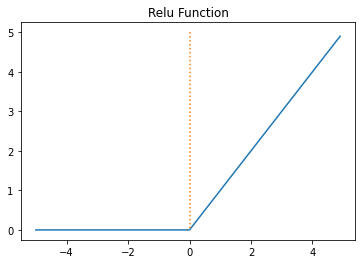

In [5]:
# 렐루(ReLU) 함수 : 인공신경망에서 가장 최고의 인기
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

음수를 입력하면 0, 양수 입력하면 입력값 그대로 반환. 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 잘 작동. 연산도 딱히 필요하지 않고 단순 임계값이기 때문에 속도도 빠름 <br>
여전한 문제: 입력값이 음수면 기울기도 0이 됨. 이 뉴런은 다시 회생하는 것이 매우 어려움. ('죽은 렐루'_ dying ReLU)

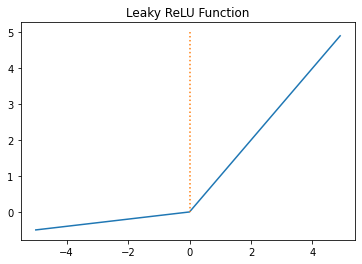

In [10]:
# 리키 렐루(Leaky ReLU)
# 죽은 렐루를 보완하기 위한 ReLU의 다양한 변형 중 하나. 입력값이 음수일 경우 0 대신 0에 가까운 매우 작은 양수를 반환하도록 됨
a = 0.1 # a: hyperparameter '새는(leaky) 정도'
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

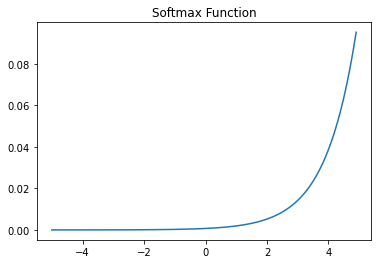

In [11]:
# 소프트맥스 함수
# 은닉층에서 렐루 함수들을 사용하는 것이 일반적이지만, 시그모이드/소프트맥스 함수는 분류 문제에서 출력층에 적용해 사용
# sigmoid 함수가 이진분류에 주로 사용된다면, softmax는 다중 클래스 분류에 주로 사용됨

x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

### 순전파
행렬의 곱셈을 이용한 Forward Propagation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential() # 층 추가할 준비
model.add(Dense(8, input_dim = 4, init = 'uniform' , activation = 'relu'))
# 입력층(뉴런 수: 4)과 다음 은닉층(뉴런 수: 8), 은닉층의 활성화함수 relu
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax')) # 출력층(3), 활성화함수 softmax